## Evaluate

Key Settings:
- Asset Class: Equity
- Controlled by get_signal
    - threshold: average of the past year
    - signal definition: $\beta^- - \beta$
    - using daily returns to estimte beta: yes
    - using log returns to calculate beta: no
- Controlled by evaluate
    - rebalance frequency: Monthly
    - timeframe: 2001-01-01 to 2023-09-29 (if data is available)
    - remove micro caps: Yes

In [1]:
import qpm
import pandas as pd
from utils import analyze_strategy_alt, performanceMetrics

In [2]:
_STRATEGY_NAME = 'Equity'

_DATA_DIR = '../Data'
_STRATEGY_DIR = '../Strategy'
_SORT_FREQUENCY = 'Monthly'

_SAMPLE_START = '2001-01-01'
_SAMPLE_END = '2023-09-29'
_REMOVE_MICRO_CAPS = True
_NUM_PORT = 5

In [3]:
df_monthly = qpm.load_data(data_dir = _DATA_DIR, file_name = 'MasterData.parquet')
signals_rolling = pd.read_parquet(f'{_STRATEGY_DIR}/signals_Equity.parquet')

> Loading Raw Data...
> Renaming key variables...
> Dropping duplicates...
> Creating Auxiliary Variables...


In [4]:
df_monthly = df_monthly.merge(signals_rolling, on=['permno', 'ldate'], how='left')

In [5]:
df_monthly['signal'] = qpm.create_lag(df_monthly, var_name='signal', lag=1)
df_select = qpm.select_sample(df_monthly, sample_start = _SAMPLE_START, sample_end = _SAMPLE_END, remove_micro_caps = _REMOVE_MICRO_CAPS)

> Selecting Sample for Given Criteria...


In [6]:
df_select, df_rets = qpm.create_portfolios(df_select, sort_frequency = _SORT_FREQUENCY, num_port = _NUM_PORT)
print(df_rets.tail())

> Sorting stocks into 5 portfolios at frequency: Monthly...
> Computing returns using various weights...
         ldate  retP_rank_longonly  retP_rank_longshort  retP_vw_P1  \
254 2023-03-01           -0.026232             0.001910    0.034616   
255 2023-04-01           -0.004295             0.046801   -0.006391   
256 2023-05-01           -0.018691            -0.026873    0.011691   
257 2023-06-01            0.076912            -0.013488    0.070404   
258 2023-07-01            0.048874            -0.031385    0.047989   

     retP_vw_P2  retP_vw_P3  retP_vw_P4  retP_vw_P5   retF_vw  
254    0.035813    0.036357    0.025590   -0.008783 -0.043399  
255   -0.007641    0.014436    0.024398    0.016674  0.023065  
256    0.057122    0.008009   -0.050779   -0.014895 -0.026587  
257    0.076117    0.076022    0.060639    0.062778 -0.007626  
258    0.044058    0.034144    0.023704    0.034972 -0.013017  


> Merging strategy returns with Fama and French factor returns...


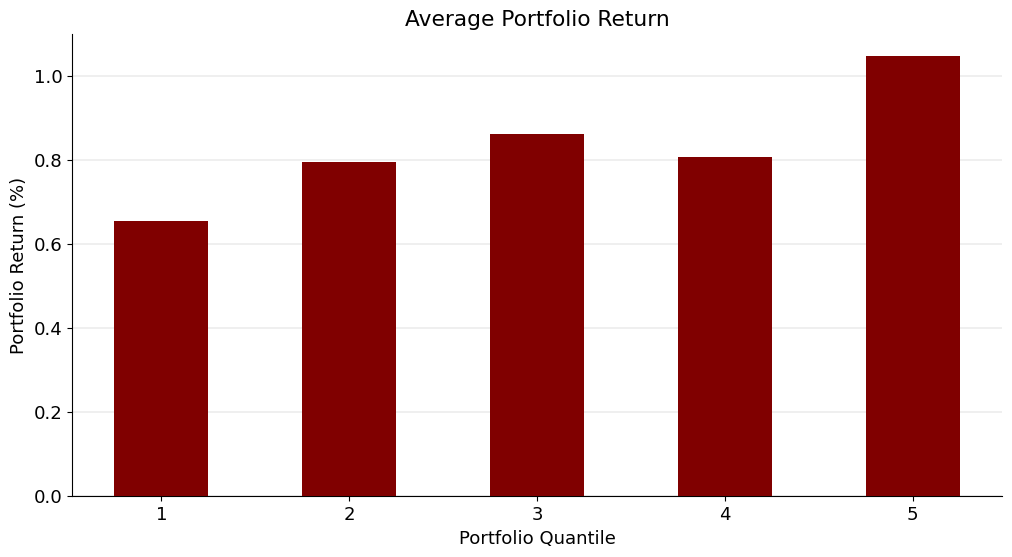

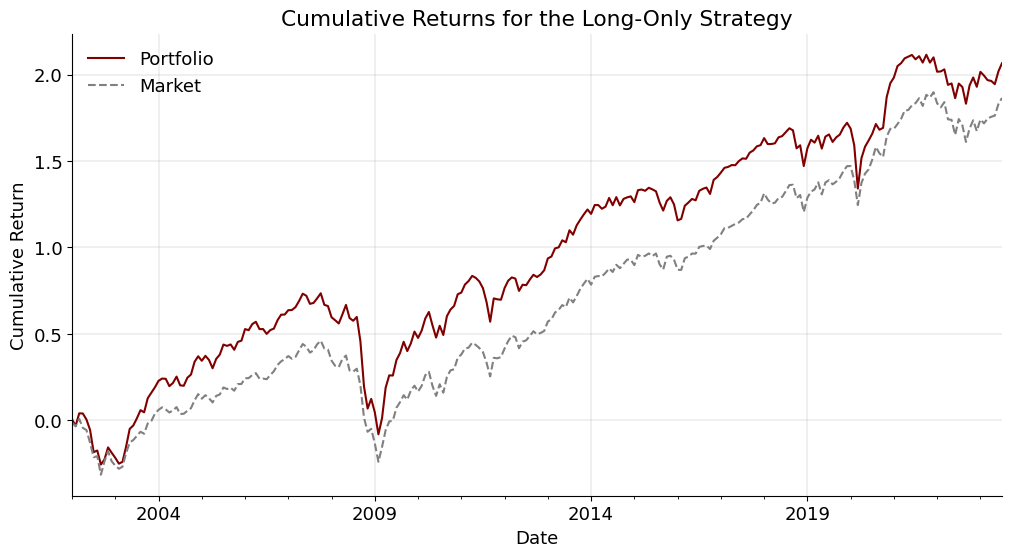

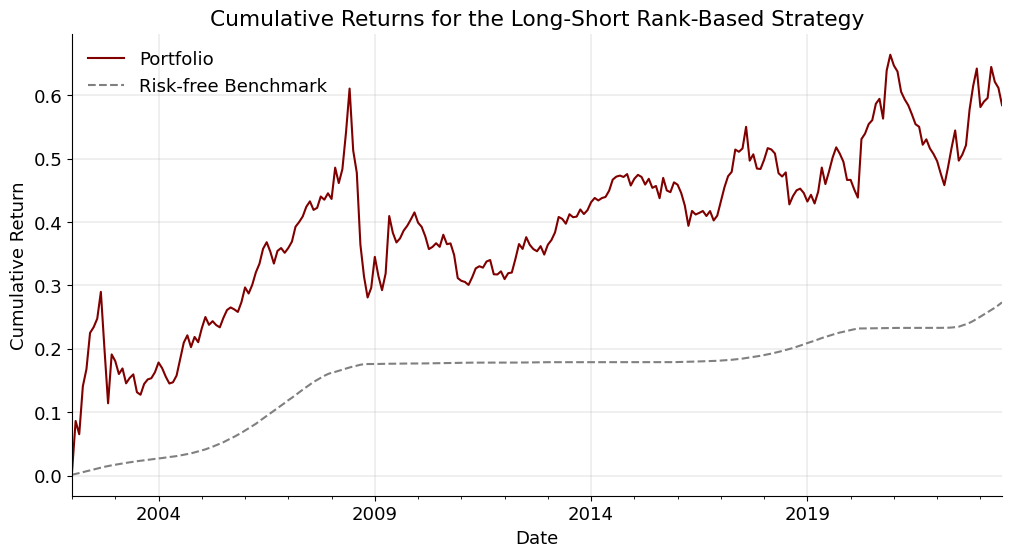

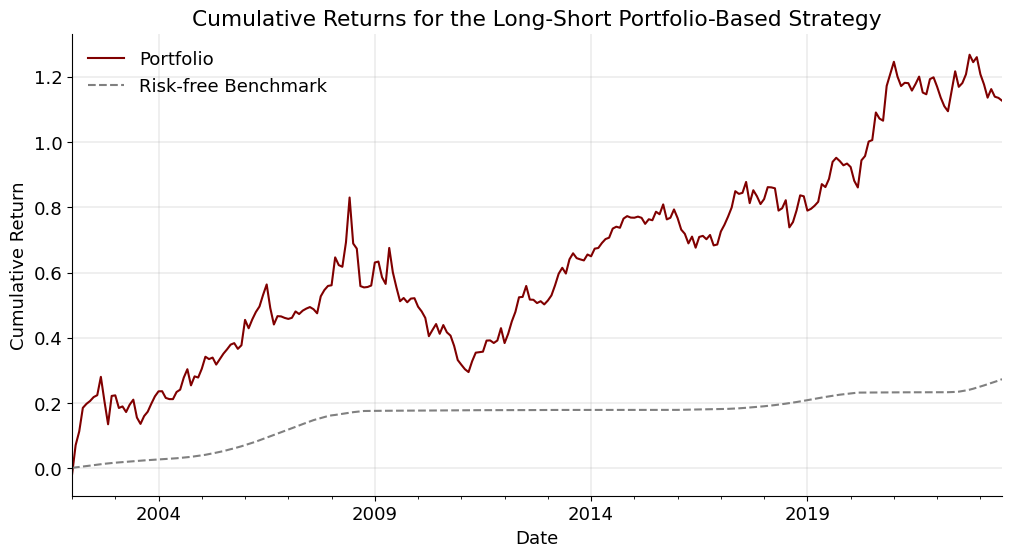

In [7]:
qpm.analyze_strategy(df_rets, analysis_type = 'Performance')

In [8]:
qpm.analyze_strategy(df_rets, analysis_type = 'Summary')

> Merging strategy returns with Fama and French factor returns...
                     count      mean       std       min       25%       50%  \
retP_rank_longonly   259.0  0.009588  0.055838 -0.230408 -0.020276  0.012705   
retP_rank_longshort  259.0  0.001539  0.025998 -0.108652 -0.012201  0.002985   
retF_vw              259.0  0.003929  0.035567 -0.133022 -0.014608  0.003397   
mktrf                259.0  0.007182  0.044835 -0.172300 -0.017950  0.011900   
smb                  259.0  0.001563  0.026194 -0.082800 -0.015350  0.001600   
hml                  259.0 -0.000142  0.031037 -0.138700 -0.016850 -0.001500   

                          75%       max  
retP_rank_longonly   0.041365  0.194869  
retP_rank_longshort  0.012655  0.096720  
retF_vw              0.023352  0.145260  
mktrf                0.032850  0.136500  
smb                  0.018500  0.071300  
hml                  0.015300  0.127500  


In [9]:
analyze_strategy_alt(df_rets, analysis_type = 'Factor Regression')

> Merging strategy returns with Fama and French factor returns...

---------------------------------------------------------------
> Running Factor Regressions: Table 1  - 3 Fama-French Factors
---------------------------------------------------------------

                 (1)       (2)      (3)      (4)       (5)      (6)   
----------------------------------------------------------------------
const          0.0045** 0.0001    0.0018   0.0045** 0.0000    0.0018  
               (0.0022) (0.0011)  (0.0016) (0.0022) (0.0006)  (0.0016)
mktrf          -0.0831* 1.1801*** -0.0331  -0.0691  1.0575*** -0.0226 
               (0.0492) (0.0252)  (0.0361) (0.0524) (0.0145)  (0.0385)
hml                                        -0.0727  0.0785*** 0.0021  
                                           (0.0747) (0.0206)  (0.0549)
smb                                        -0.0382  0.5854*** -0.0538 
                                           (0.0932) (0.0257)  (0.0685)
R-squared      0.0110   0.8951 

In [10]:
analyze_strategy_alt(df_rets, analysis_type = 'Additional Regression')

> Merging strategy returns with Fama and French factor returns...



---------------------------------------------------------------
> Running Factor Regressions: Table 3 - Additional Regressions
---------------------------------------------------------------

                  (1)       (2)        (3)       (4)        (5)        (6)       (7)       (8)   
-------------------------------------------------------------------------------------------------
const          0.0027    0.0019*    0.0002    0.0000     0.0011     0.0019*** 0.0012*   0.0000   
               (0.0022)  (0.0011)   (0.0016)  (0.0008)   (0.0008)   (0.0007)  (0.0007)  (0.0008) 
mktrf          0.1897*** 1.0202***  0.1729*** 1.1691***  0.9778***  0.9096*** 0.9509*** 1.1691***
               (0.0704)  (0.0347)   (0.0510)  (0.0179)   (0.0166)   (0.0152)  (0.0158)  (0.0179) 
bab            0.3401*** -0.2062*** 0.2499***                                                    
               (0.0665)  (0.0328)   (0.0482)         

,Mean,Vol,Sharpe,Maximum drawdown,VaR-5th
retP_rank_longonly,0.102382,0.193731,0.528472,-0.574914,-0.093168
retP_rank_longshort,0.005789,0.090169,0.064207,-0.289001,-0.042873
retF_vw,0.034469,0.123483,0.279144,-0.423762,-0.058894


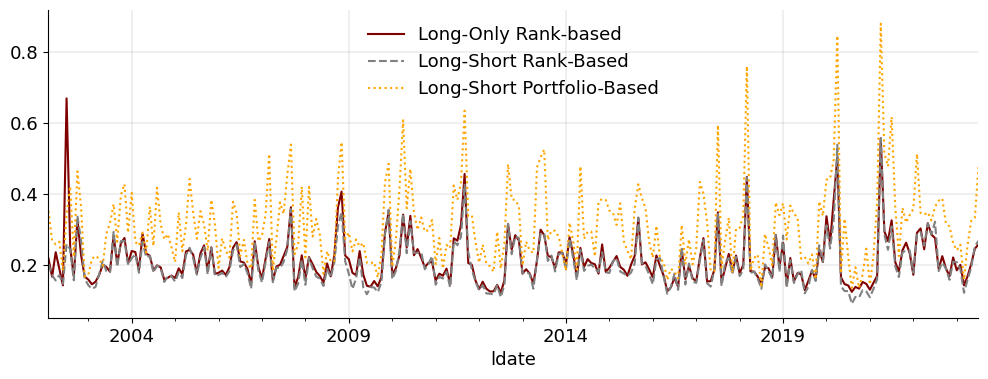

In [11]:
performanceMetrics(df_select, df_rets, group_name='permno')